In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

In [3]:
sentence = df['headline']
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_documents = vectorizer.fit_transform(sentence)

In [4]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [5]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

Python(8806) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [8]:
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_

print(results.sample(20))

                                                document  cluster
17368  man in bar makes general inquiry about the ladies        0
22432  big wave surfer breaks his back in harrowing w...        0
25385  tea-party host struggling to keep conversation...        0
7393         30 days of online dating: naughty by nature        0
7462   museum gift shop openly daring anyone to spend...        0
16986  one key thing writing teachers never told me a...        0
14822  new robert altman film released straight to sp...        0
9162           what's missing from the marriage decision        0
6014   17 wedding pics that will make you want to coz...        0
3712   surge soda is back! (and has already sold out ...        0
7149           the kind of demonstration i'd like to see        0
16237  a 'sea of black masks': prosecutors open felon...        0
20312  steady job growth is still not boosting worker...        0
12065  poll finds majority of americans have never me...        0
928       

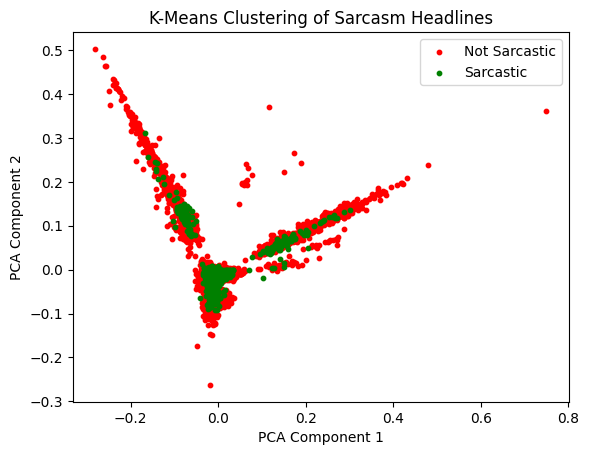

In [7]:
colors = ['red', 'green']
cluster_labels = ['Not Sarcastic', 'Sarcastic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f'{cluster_labels[i]}')

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Sarcasm Headlines')
plt.show()